In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sys

In [3]:
df = pd.read_csv('new_hps9.csv')
for index, row in df.iterrows():
    if row['state_metropolitan'] == 'metropolitan':
        df.at[index,'state_metropolitan'] = 1
    else:
        df.at[index,'state_metropolitan'] = 0
        
del df["teach_indivisualstudy"]
del df["Week"]
X = df.iloc[:,2:22]
y = df.iloc[:,-1] 


In [4]:
print(df)

        States  UI_quarantined  UI_highrisk state_metropolitan  \
0            1               1            0                  0   
1            1               1            0                  0   
2            1               1            0                  0   
3            1               1            0                  0   
4            1               1            0                  0   
...        ...             ...          ...                ...   
188763      56               1            0                  0   
188764      56               1            0                  0   
188765      56               1            0                  0   
188766      56               1            0                  0   
188767      56               1            0                  0   

        Marital_Status  Food_Sufficency  Private_Health_insurance_status  \
0                    3                3                                1   
1                    1                1                

[0.03470099 0.         0.06513907 0.07493596 0.02098174 0.04842737
 0.08740324 0.08233644 0.08116948 0.087117   0.03292329 0.14409044
 0.02407355 0.02070364 0.018685   0.01097534 0.01424523 0.05580525
 0.09042078 0.00586619]


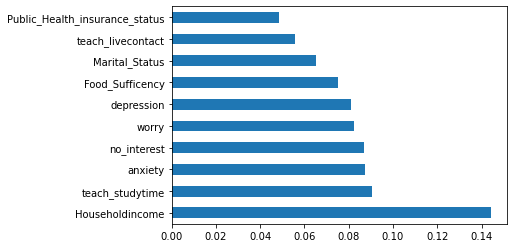

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [7]:
X = df[[ "Householdincome", "teach_studytime", "teach_livecontact", "anxiety", "worry", "Marital_Status", "Food_Sufficency", "no_interest","depression","Public_Health_insurance_status"]].to_numpy()
y = df[['whether_study']].to_numpy()
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1]:
from sklearn.tree import DecisionTreeClassifier
tree_train_list = []
index = []
tree_test_list = []
for i in range(100):
    index.append(i+ 1)
    tree = DecisionTreeClassifier(max_depth=i + 1)
    tree.fit(X_train, y_train)
    tree_test_list.append(tree.score(X_test, y_test)) 
    tree_train_list.append(tree.score(X_train, y_train)) 

NameError: name 'X_train' is not defined

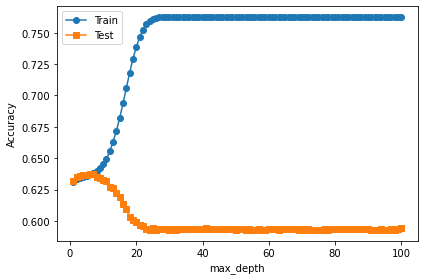

In [9]:
plt.plot(index, tree_train_list, marker='o', label='Train')
plt.plot(index, tree_test_list, marker='s', label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.tight_layout()

In [10]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=123)

new_list = [None]
for i in range(20):
    new_list.append(i+1)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': new_list
}

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 63.57%
Best Params: {'criterion': 'entropy', 'max_depth': 6}
Test Accuracy: 63.76%


In [11]:
y_pred_tree = gs.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
tree_conf = confusion_matrix(y_test, y_pred_tree)
print(tree_conf)
print(classification_report(y_test, y_pred_tree))


[[33529  2269]
 [18256  2577]]
              precision    recall  f1-score   support

           0       0.65      0.94      0.77     35798
           1       0.53      0.12      0.20     20833

    accuracy                           0.64     56631
   macro avg       0.59      0.53      0.48     56631
weighted avg       0.60      0.64      0.56     56631



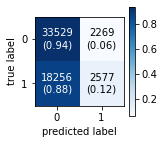

In [12]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=tree_conf,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(2, 2))
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

log_res = LogisticRegression(random_state=123, C = 0.001)

log_res.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = log_res.predict(X_test)
print(mean_squared_error(y_test, y_pred))

print('Test Accuracy: %.2f%%' % (log_res.score(X_test, y_test)*100))

0.36781974536914414
Test Accuracy: 63.22%


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=123)

param_grid_forest = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 20, 50, 100, 150],
    'max_depth': [1, 10, 50, 100, 150]
}

gs_forest = GridSearchCV(estimator=forest,
                  param_grid=param_grid_forest,
                  scoring='accuracy',
                  cv=10)

gs_forest.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs_forest.best_score_*100))
print('Best Params: %s' % gs_forest.best_params_)
print('Test Accuracy: %.2f%%' % (gs_forest.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 63.49%
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
Test Accuracy: 63.69%


In [15]:
y_pred_tree_1 = gs_forest.best_estimator_.predict(X_test)

tree_conf_1 = confusion_matrix(y_test, y_pred_tree_1)
print(tree_conf_1)
print(classification_report(y_test, y_pred_tree_1))

[[34411  1387]
 [19173  1660]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77     35798
           1       0.54      0.08      0.14     20833

    accuracy                           0.64     56631
   macro avg       0.59      0.52      0.45     56631
weighted avg       0.61      0.64      0.54     56631



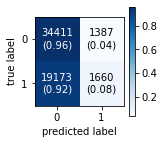

In [16]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=tree_conf_1,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(2, 2))
plt.show()

In [17]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb=nb.score(X_test,y_test)

print('Test Accuracy: %.2f%%' % (nb*100))

Test Accuracy: 63.45%
